In [18]:
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt

In [31]:
N = 100
B = 0
mu = 0.33 # g mu
J = 0.2
k = 0.01 # Boltzmann
T = 50
state = np.zeros((N)) # spins up ( 1 ) , down ( 0 )
S = np.zeros((N),float)
U = np.zeros(99)
#random.seed () # Seed generator
t = np.linspace(0,99,99)

def energy(S):
    FirstTerm = 0
    SecondTerm = 0 
    
    for i in range (0 , N-2): 
        FirstTerm += (-J)*S[i]* S[i + 1]
        
    for i in range (0 ,N-1):
        SecondTerm += S[i]
        SecondTerm *= -B*mu
    return ( FirstTerm + SecondTerm ) 



In [32]:
for b in range (0,N):
    state[b] = -1
    
ES = energy(state)
print(ES)

-19.599999999999962


In [33]:
img = Image.new("RGB",(500,500),(255,255,255))
pixTuple1 = (10,10,10)
pixTuple2 = (240,240,240)
  

for c in range (0,494):
    if c%5 == 0:
        
        for d in range(0,99):
            if state[d] == 1:
                for i in range(5*d,5*d+4):
                    for j in range(c,c+4):
                        img.putpixel((i,j),pixTuple2)
            elif state[d] == -1:
                for i in range(5*d,5*d+4):
                    for j in range(c,c+4):
                        img.putpixel((i,j),pixTuple1)
   
                        
                        
                        
                        
                        
    test = np.array(state)
    r = int(N*random.random())
    test[r] *= -1
    ET = energy(test)
    
    p = np.exp ((ES-ET)/(k*T))
    if p >= random.random():
        
        state = np.array(test)
        ES = ET
    if c%5 == 0:
        U[int(c/5)] = ES
    

        
        
img.save("bb.png")

sum1 = sum(state)
print('Magnetization:',sum1)
print('Internal Energy:',ES)

Magnetization: 4.0
Internal Energy: -4.000000000000001


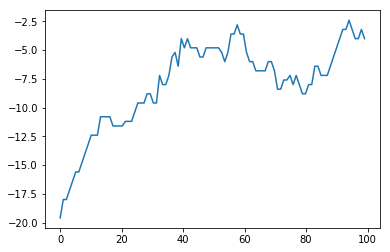

In [34]:
#print(U)
plt.plot(t,U)
plt.show()